<a href="https://colab.research.google.com/github/JsantosAn/Desafio-FrontEnd-2021/blob/main/TrabalhoIAFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy.random import randint
from numpy.random import rand
from random import randrange
import numpy.random as rn
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import seaborn as sns
import time
from tqdm import tqdm


class MLPlayer(object):
    def __init__(self, peso, bias):
        self.weights =  peso
        self.bias =  bias
    def forward_propagate(self, inputs):
        net_inputs = np.dot(inputs, self.weights)# + self.bias
        activations = self.TanH(net_inputs)
        return activations
    def TanH(self,x):
        return np.tanh(x)
    def _mse(self, target, output):
        MSE = np.square(np.subtract(target,output)).mean()   
        return math.sqrt(MSE)
def PesosBias(oculta,x_teste,pop):
  b2 = []
  p = np.array_split(pop,3)
  for x in range(len(p)):
    if (len(p[x]) > oculta):
      r = randrange(0, len(p[x]))
      b2 = p[x][r]
      p[x] =  np.delete(p[x], r)  
  p1 = p[2].reshape(1,oculta)
  b1 = p[0]
  p2 = p[1].reshape(oculta,1)
  hidden = MLPlayer(p1, b1)
  output = MLPlayer(p2, b2)
  hidden_outputs = hidden.forward_propagate(x_teste)
  y = output.forward_propagate(hidden_outputs)
  return y
def _mse(target, output):
  MSE = np.square(np.subtract(target,output)).mean()   
  return math.sqrt(MSE)

In [7]:
X_treino = np.arange(-np.pi, np.pi, 0.2).reshape(32, 1)
y_treino = np.sin(X_treino)
y_treino += np.random.normal(loc=0,scale=0.1, size=y_treino.shape).reshape(32, 1)
X_teste = np.arange(0, 2*np.pi, 0.2).reshape(32, 1)
y_teste  = np.sin(X_teste)
y_teste += np.random.normal(loc=0,scale=0.1, size=X_teste.shape).reshape(32, 1)

In [3]:
def plot(progresso,y_pred_treino,y_pred,x_teste,c,fo):
  plt.figure(figsize=(10, 5))
  plt.plot(progresso,label=1100)
  plt.xlabel('Iterações')
  plt.ylabel('FO')
  plt.title(f"FO: {fo}, Camada: {c}")
  plt.show()
  
  plt.figure(figsize=(10, 5))
  plt.plot(X_teste, y_teste ,'o', label='Teste')
  plt.plot(X_treino, y_treino,'o', label='Treino')
  plt.plot(x_teste, y_pred, 'b-o',label='Predito')
  plt.title(f"FO: {fo}, Camada: {c}")
  legend = plt.legend(loc ="upper right")
  plt.show()


# **SA**

In [4]:
class SA(object):
  def __init__(self,oculta,saida,x_teste,y_teste,objective, n_iter,temperature,search_space,desv,alpha):
        self.oculta =  oculta
        self.saida =  saida
        self.x_teste =  x_teste
        self.y_teste =  y_teste
        self.objective =  objective
        self.n_iter =  n_iter
        self.temperature =  temperature
        self.search_space =  search_space
        self.desv = desv
        self.alpha = alpha

  def gera_vizinhos(self,solucao, desvio_padrao, n_vizinhos, espaco_busca):
      vizinhos = []
      mut = random.uniform(0,1)
      for _ in range(n_vizinhos):
        if mut <= 0.5:
          vizinho = solucao + np.random.normal(loc=0, scale=desvio_padrao)
        else:
          vizinho = np.random.uniform(-5.0, 5.0)

        while vizinho < espaco_busca[0] or vizinho > espaco_busca[1]:
              vizinho = solucao + np.random.normal(loc=0, scale=desvio_padrao)
        vizinhos.append(vizinho)
      return vizinhos

  def Simulate_A(self):
    tamanho =  self.oculta * 3
    solucao = 10 * np.random.random_sample((tamanho+self.saida))-5
    progresso = []
    temperatures = [self.temperature]

    pb = PesosBias(self.oculta,self.x_teste,solucao)
    valor_funcao_objetivo = self.objective(pb,self.y_teste)
    for i in range(self.n_iter):
        rd = random.randint(0,len(solucao)-1)
        v = self.gera_vizinhos(solucao[rd], self.desv,1, self.search_space)
        vizinho = np.delete(solucao, rd)
        vizinho=np.insert(vizinho,rd,v)
        pb = PesosBias(self.oculta,self.x_teste,vizinho)
        fo_vizinho = self.objective(self.y_teste,pb)
        delta = fo_vizinho - valor_funcao_objetivo
        progresso.append(valor_funcao_objetivo)
        if delta < 0: 
            solucao = vizinho
            valor_funcao_objetivo = fo_vizinho
            y = pb
        else:  
          prob_aceitacao = np.exp((-delta) /  self.temperature)
          if np.random.random() < prob_aceitacao:
            solucao = vizinho
            valor_funcao_objetivo = fo_vizinho
            y = pb

          self.temperature *= self.alpha
          temperatures.append(self.temperature)      
    #print(f"FO: {valor_funcao_objetivo}")
    return progresso,y,valor_funcao_objetivo,solucao

rsme treino: 0.17056741888185492, rsme teste: 0.31682396366404675


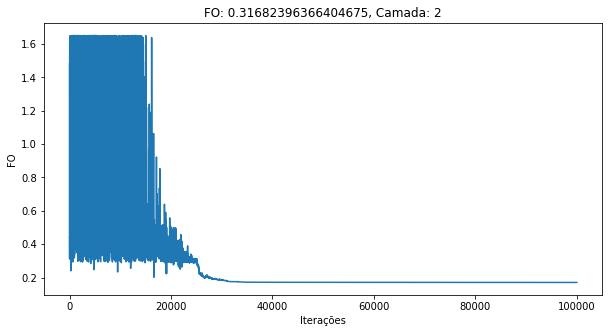

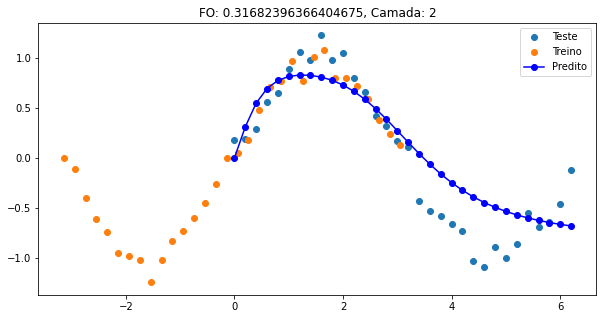

rsme treino: 0.13014878687795176, rsme teste: 0.29659575723327963


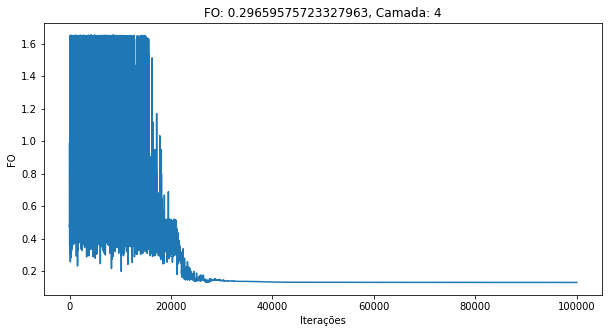

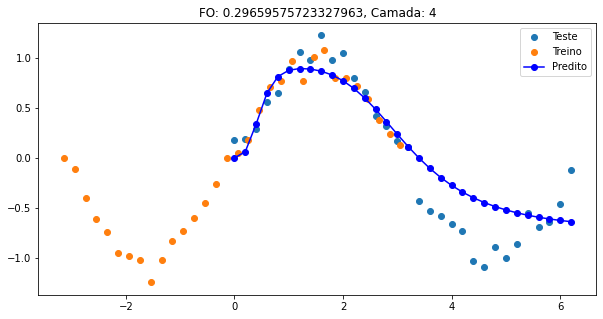

rsme treino: 0.12795470496919056, rsme teste: 0.2960944420894088


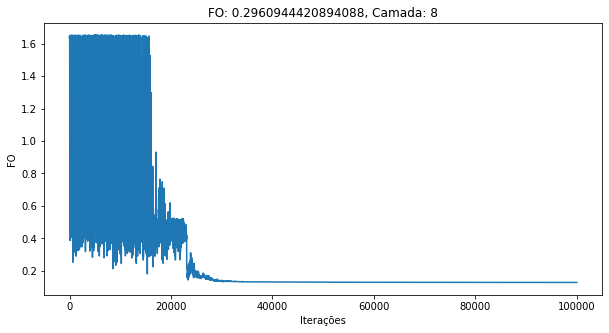

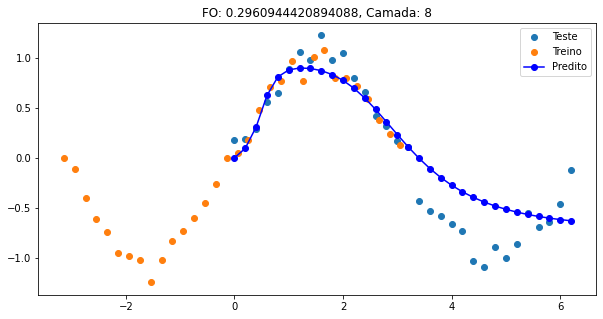

rsme treino: 0.11277270623014594, rsme teste: 0.23964225524879412


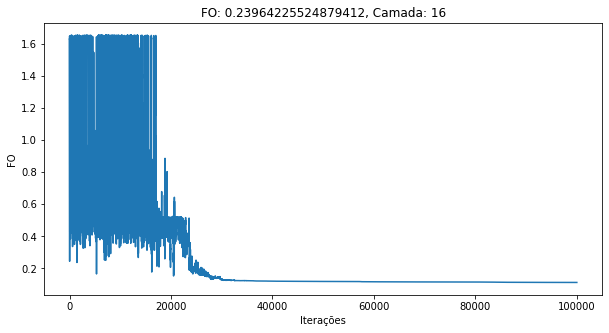

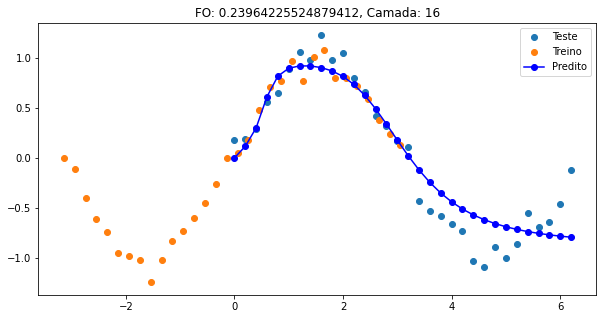

rsme treino: 0.10150732060889296, rsme teste: 0.2294864982202046


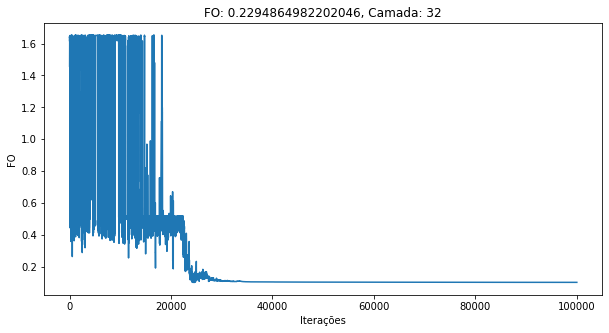

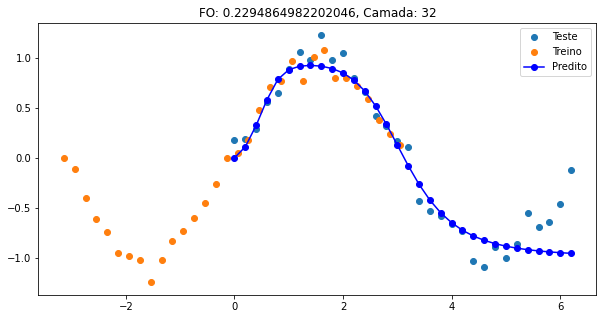

rsme treino: 0.09961863251911579, rsme teste: 0.2180543239422947


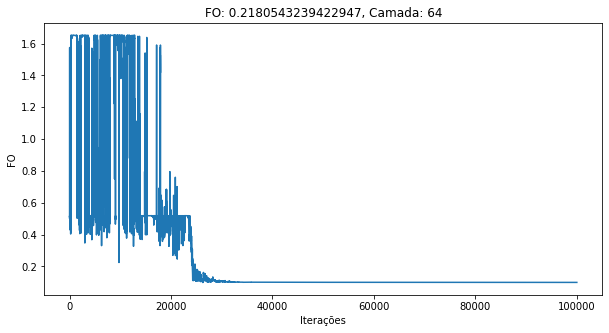

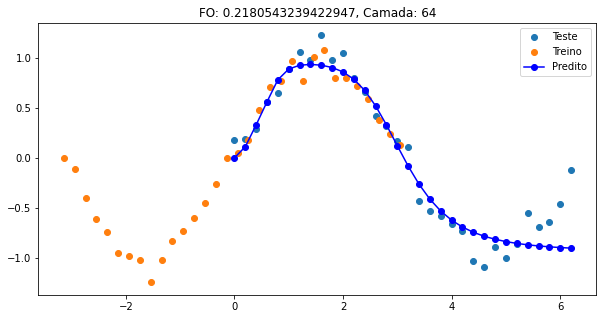

rsme treino: 0.10039553949727273, rsme teste: 0.2325921358046425


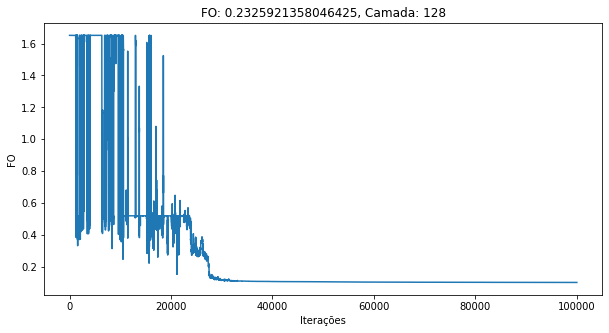

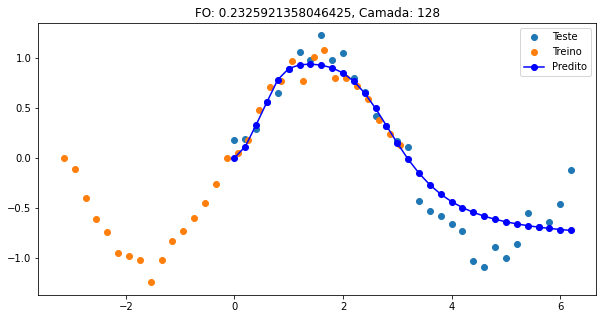

In [8]:
search_space = [-5, 5]
desv = 0.2
n_iter = 100000
n_pop = 50
temperature = 100
alpha = 0.9995
camadas = [ 2, 4, 8, 16, 32, 64 , 128 ]
for c in camadas:
  SimuA = SA(c,1,X_treino,y_treino,_mse, n_iter,temperature,search_space,desv,alpha)
  progresso, y_pred, fo,solucao= SimuA.Simulate_A()
  
  y = PesosBias(c,X_treino,solucao)
  y_pred = PesosBias(c,X_teste,solucao)
  r_treino= _mse(y_treino,y)
  r_teste= _mse(y_teste,y_pred)
  print(f"rsme treino: {r_treino}, rsme teste: {r_teste}")
  plot(progresso,y,y_pred,X_teste,c,r_teste)


# **GA**

In [9]:
class GA(object):
  def __init__(self,oculta,saida,x_treino,y_treino,objective, n_iter, n_pop, r_mut):
          self.oculta =  oculta
          self.saida =  saida
          self.x_treino =  x_treino
          self.y_treino =  y_treino
          self.objective =  objective
          self.n_iter =  n_iter
          self.n_pop =  n_pop
          self.r_mut =  r_mut

  def TournamentSelection(self,population, score):
    r1 = random.randint(0, len(score)-1)
    r2 = random.randint(0, len(score)-1)
    if score[r1] < score[r2]:
      p1 =  population[r1]
    else:
      p1 =  population[r2]
    return p1 
  def crossover(self,p1, p2):
    a = random.uniform(0,1)
    c1 = a*p1+(1-a)*p2
    c2 =  a*p2+(1-a)*p1 
    return c1, c2

  def mutation(self,bitstring, r_mut):
    for i in bitstring:
      for x in range(len(i)):
        mut = np.random.random()
        if mut < r_mut:
          i[x] += np.random.normal(loc=0, scale=1)
        else: 
          i[x] = np.random.uniform(-5.0, 5.0, 1)
    return bitstring

  def genetic_algorithm(self):
    tamanho =  self.oculta * 3
    progress = []
    pop = [10 * np.random.random_sample((tamanho+self.saida, self.saida)) - 5 for _ in range(n_pop)]
    best = 0
    mim_value = None
    best_y = PesosBias(self.oculta,self.x_treino,pop[0])
    best_eval = self.objective(self.y_treino,best_y)

    for gen in  tqdm (range (self.n_iter), desc="Loading..."):

      scores = []

      for i in range( self.n_pop):
        y = PesosBias(self.oculta,self.x_treino,pop[i])
        rmse = self.objective(self.y_treino,y)
        scores.append(rmse)
        if rmse < best_eval:
          best, best_eval = pop[i], rmse
          #print(">%d, %f" % (gen,rmse))
      children = list()
      children.append(best)
      for i in range(1, self.n_pop ,2):
        p1 = self.TournamentSelection(pop, scores)
        p2 = self.TournamentSelection(pop, scores)
        c1,c2 = self.crossover(p1, p2)
        if np.random.random() < 0.1:
          children.append(self.mutation(c1, self.r_mut))
        else:
          children.append(c1)

        if np.random.random() < 0.1:
          children.append(self.mutation(c2, self.r_mut))
        else:
          children.append(c2)
      
      progress.append(best_eval)
      pop = children
    return best,best_eval,progress

Loading...: 100%|██████████| 2000/2000 [00:08<00:00, 231.72it/s]


rsme treino: 0.19662744315394542, rsme teste: 0.4609243541807829


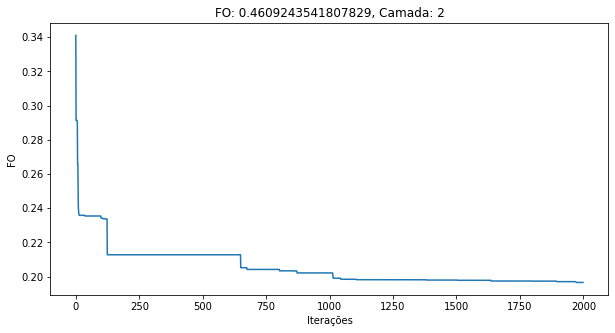

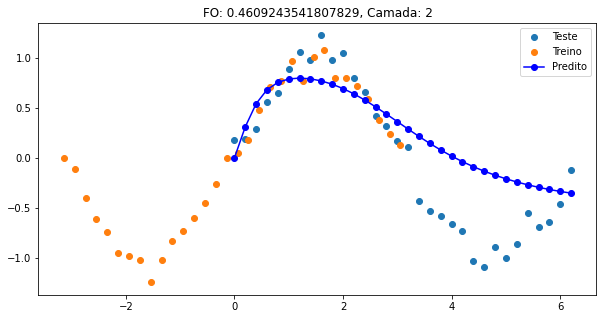

Loading...: 100%|██████████| 2000/2000 [00:07<00:00, 253.55it/s]


rsme treino: 0.15145244371663036, rsme teste: 0.2740696682541218


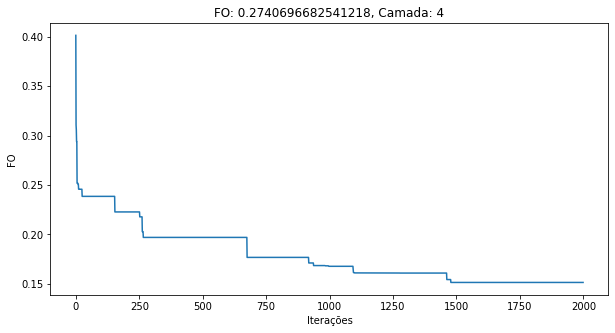

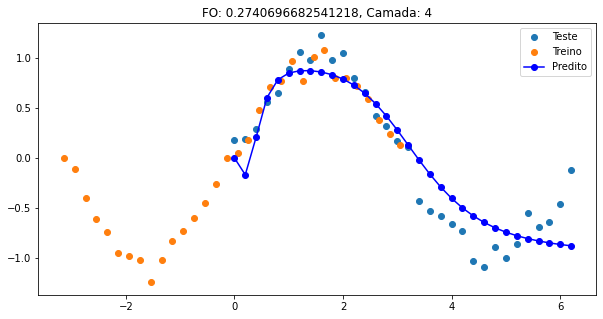

Loading...: 100%|██████████| 2000/2000 [00:09<00:00, 220.93it/s]


rsme treino: 0.14630607074132207, rsme teste: 0.2539625508689799


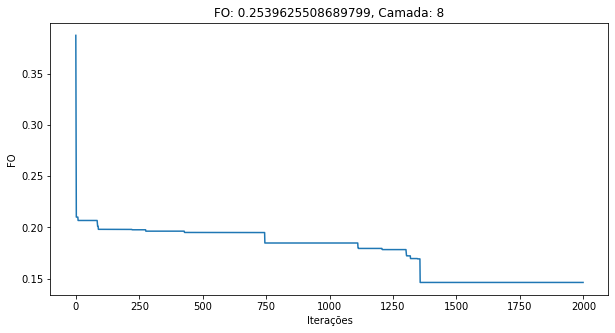

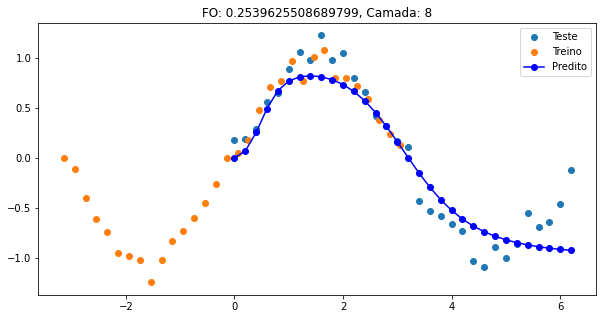

Loading...: 100%|██████████| 2000/2000 [00:10<00:00, 185.30it/s]


rsme treino: 0.13922322580674715, rsme teste: 0.26029922394660066


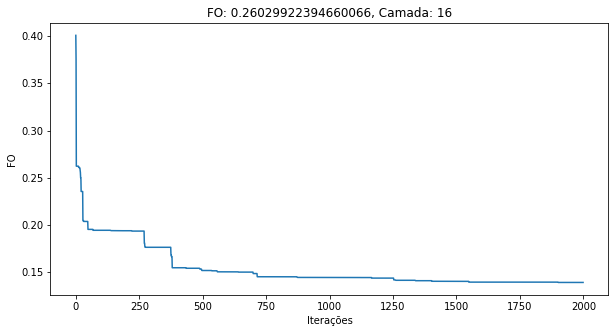

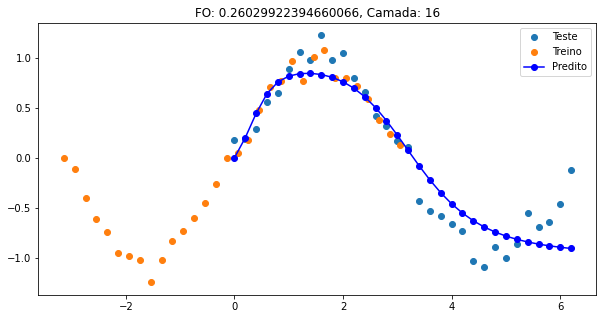

Loading...: 100%|██████████| 2000/2000 [00:14<00:00, 133.94it/s]


rsme treino: 0.13765302673258067, rsme teste: 0.2544116724212704


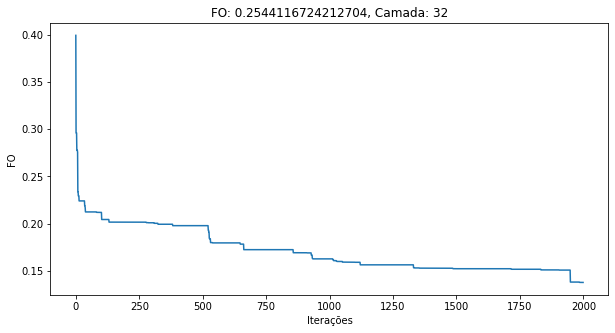

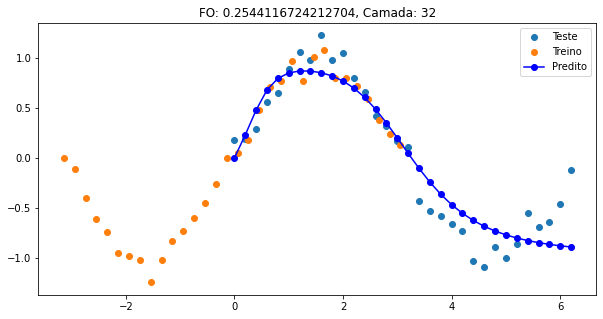

Loading...: 100%|██████████| 2000/2000 [00:23<00:00, 84.29it/s]


rsme treino: 0.10991540768017397, rsme teste: 0.23629567000424803


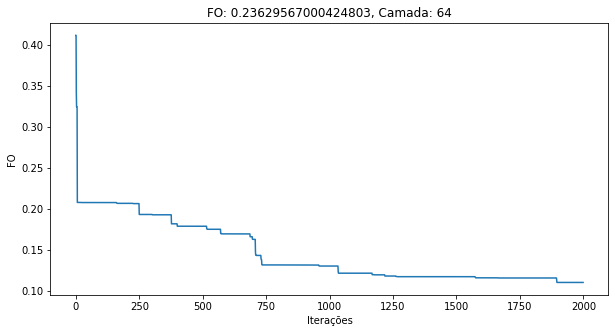

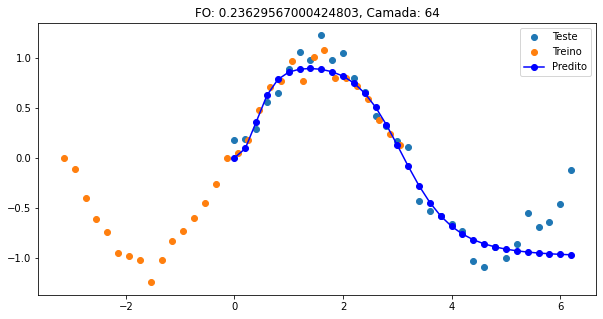

Loading...: 100%|██████████| 2000/2000 [00:40<00:00, 49.08it/s]


rsme treino: 0.1320723503414645, rsme teste: 0.2398301860164817


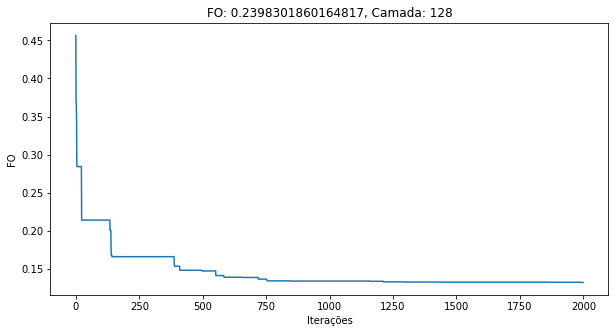

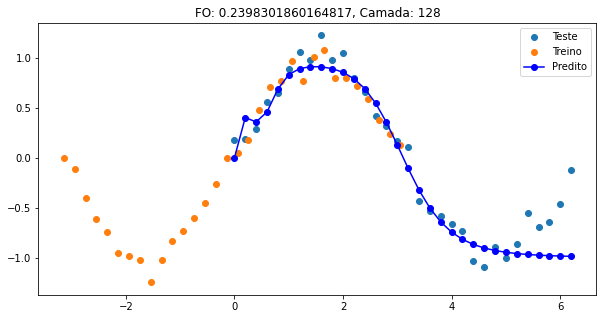

In [10]:
n_iter = 2000
n_pop = 50
r_cross = 0.3
r_mut =  0.3
camadas = [ 2, 4, 8, 16, 32, 64 , 128 ]
for c in camadas:
  Gen = GA (c,1,X_treino,y_treino,_mse,n_iter, n_pop, r_mut)
  best,best_eval,progress = Gen.genetic_algorithm()
  y_pred_treino = PesosBias(c,X_treino,best)
  y_pred = PesosBias(c,X_teste,best)
  r_treino= _mse(y_treino,y_pred_treino)
  r_teste= _mse(y_teste,y_pred)
  print(f"rsme treino: {r_treino}, rsme teste: {r_teste}")
  plot(progress,y_pred_treino,y_pred,X_teste,c,r_teste)
